In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task1: Plot the populations for the years in the period. Add legend and axis labels to the plot.

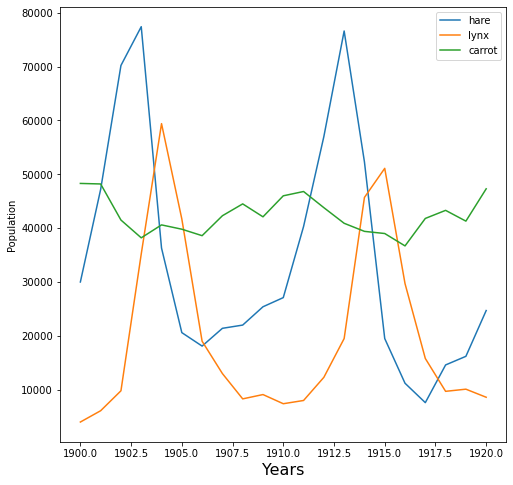

In [2]:
data = np.loadtxt("http://www.scipy-lectures.org/_downloads/populations.txt")
X = data[:,0]
hare = data[:,1]
lynx = data[:,2]
carrot = data[:,3]

plt.figure(figsize=(8,8))

plt.plot (X, hare, label="hare")
plt.plot (X, lynx, label="lynx")
plt.plot (X, carrot, label= "carrot")

plt.xlabel('Years', fontsize=16)
plt.ylabel('Population')

plt.legend()
plt.show()

# Task2:Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

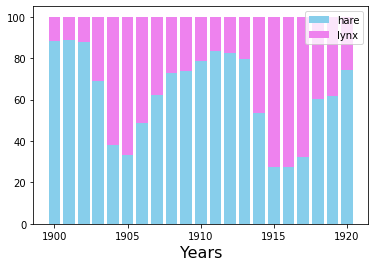

In [3]:
S= hare + lynx
H = 100 * (hare/S)
L = 100 * (lynx/S)
plt.bar(X, H, color = 'skyblue',label = 'hare')
plt.bar(X, L, bottom = H, color = 'violet',label = 'lynx')
plt.xlabel('Years',fontsize=16)
plt.legend()

plt.show()

# Task3:Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

Hare 
 Mean: 34080 
 Std: 20897.906458089667
Lynx 
 Mean: 20166 
 Std: 16254.591536908763
Carrot 
 Mean: 42400 
 Std: 3322.5062255844787


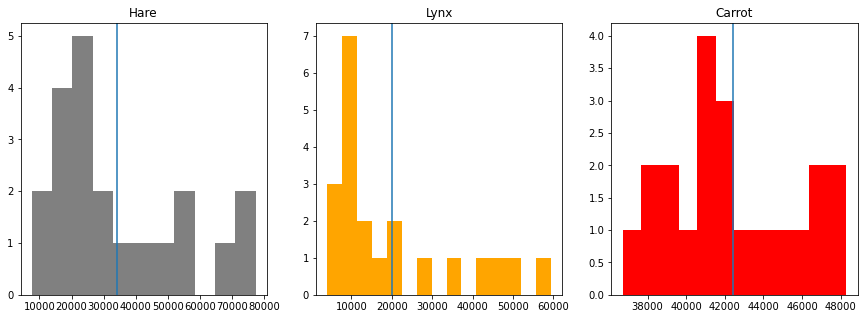

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

data_columns = np.array(['Hare','Lynx','Carrot'])
mean = np.mean(data[:,1:4],axis = 0, dtype = int)
std = np.std(data[:,1:4], axis = 0)

axes[0].hist(hare, bins = 11, color = 'grey')
axes[0].set_title('Hare')

axes[1].hist(lynx, bins = 15, color = 'orange')
axes[1].set_title('Lynx')

axes[2].hist(carrot, bins = 12, color = 'red')
axes[2].set_title('Carrot')

for i in range(3):
    print(data_columns[i],'\n','Mean:',mean[i],'\n','Std:',std[i])
    meanstring = "Mean = {:03d}".format(mean[i])
    axes[i].axvline(x = mean[i])
    
plt.show()

# Task4:Find which year each species had the largest population. Mark these years in the plot of populations.

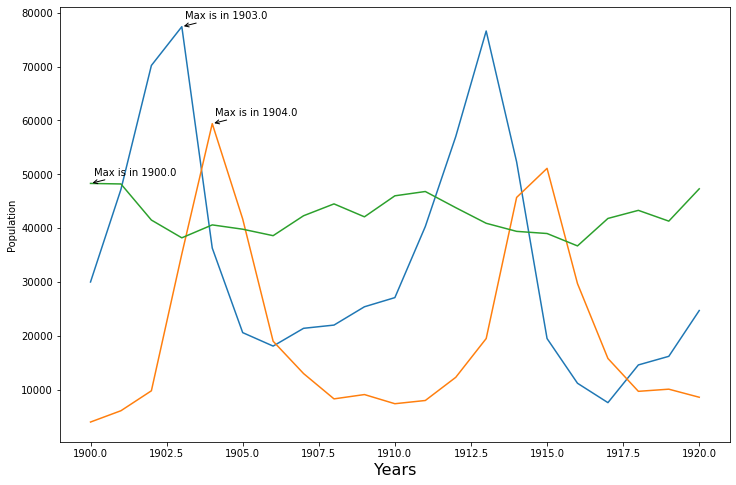

In [61]:
fig1, ax1 = plt.subplots(figsize=(12, 8))

plt.plot (X, hare, label="hare")
plt.plot (X, lynx, label="lynx")
plt.plot (X, carrot, label= "carrot")

plt.xlabel('Years', fontsize=16)
plt.ylabel('Population')

index_of_max_years = np.argmax(data[:,1:4], axis = 0)

for i in range(3):
    ax1.annotate('Max is in {}'.format(data[index_of_max_years[i],0]), 
        xy = (data[index_of_max_years[i],0],data[index_of_max_years[i],i+1]),
        xytext = (data[index_of_max_years[i],0]+0.1,data[index_of_max_years[i],i+1]+1500),
        arrowprops = dict(arrowstyle= "->", connectionstyle="arc3"))
                                  


plt.show()

# Task5:Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


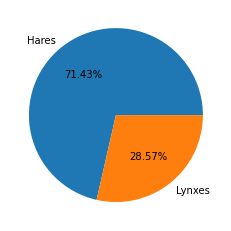

In [192]:
hl = np.where(data[:, 1] - data[:, 2] > 0, 'H', 'L')
print(hl)
animals = ['Hares', 'Lynxes']

pc = np.array([len(np.argwhere(hl == 'H')), len(np.argwhere(hl == 'L'))])

plt.pie(pc, labels=animals, autopct='%1.2f%%')
plt.show()

# Task6: Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

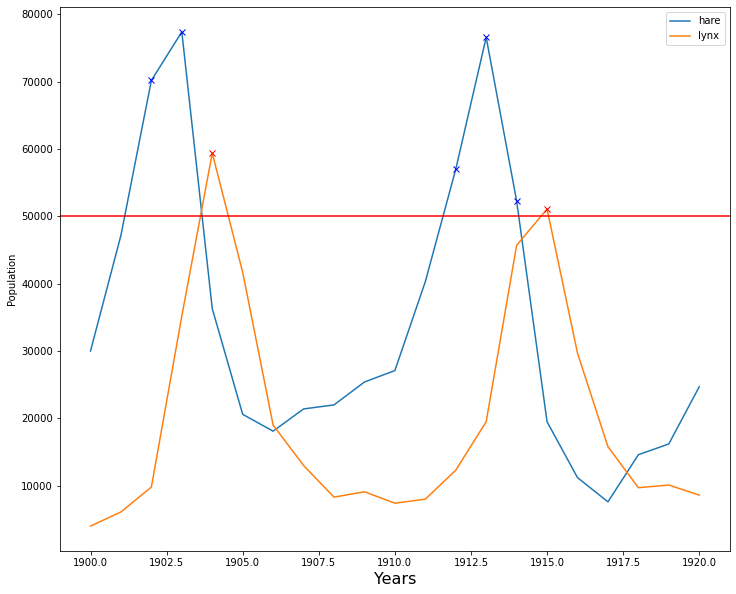

In [105]:
hare_yindx = np.where(data[:, 1] > 50000)
lynx_yindx = np.where(data[:, 2] > 50000)

fig3, ax3 = plt.subplots(figsize=(12, 10))
                        
plt.plot (X, hare, label="hare")
plt.plot (X, lynx, label="lynx")
plt.axhline(y=50000, color='r', linestyle='-')

plt.plot(data[hare_yindx,0], data[hare_yindx,1], 'bx')
plt.plot(data[lynx_yindx,0], data[lynx_yindx,2], 'x', color = 'r')

plt.xlabel('Years', fontsize=16)
plt.ylabel('Population')

plt.legend()
plt.show()

# Task 7:Find the top 2 years for each species when they had the lowest populations.

In [122]:
hare_sort = np.argsort(data[:,1], axis = 0, kind = 'quicksort')
lynx_sort = np.argsort(data[:,2], axis = 0, kind = 'quicksort')

print('Hares:', 'Top 1 - ', data[hare_sort[0],0],'\n      ','Top 2 - ', data[hare_sort[1],0])
print('Lynx:', 'Top 1 - ', data[lynx_sort[0],0],'\n     ','Top 2 - ', data[lynx_sort[1],0])

Hares: Top 1 -  1917.0 
       Top 2 -  1916.0
Lynx: Top 1 -  1900.0 
      Top 2 -  1901.0


# Task 8:Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

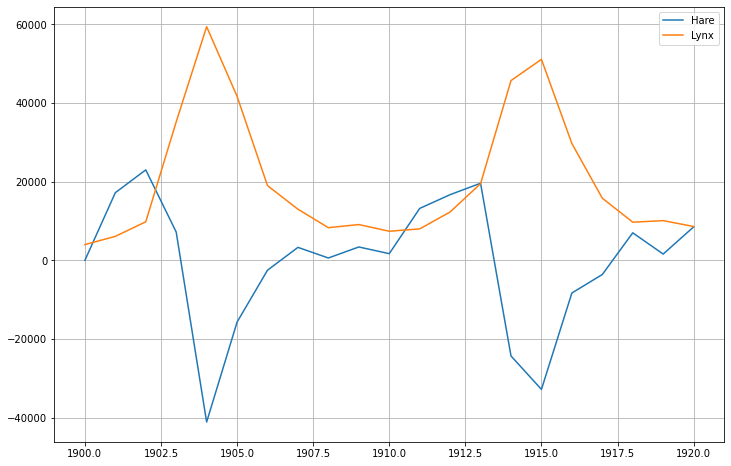

Correlation coefficient:    -0.8289727755788596


In [202]:
fig4, ax4 = plt.subplots(figsize=(12, 8))

plt.plot(X, np.insert(np.diff(data[:,1]), 0, 0), label = 'Hare')
plt.plot(X, data[:,2], label = 'Lynx')

plt.legend()
plt.grid()
plt.show()

print("Correlation coefficient:   ", np.corrcoef(np.insert(np.diff(data[:,1]), 0, 0),data[:,2])[0,1])

# Task 9:Show population of hares vs carrots and hares vs lynxes.

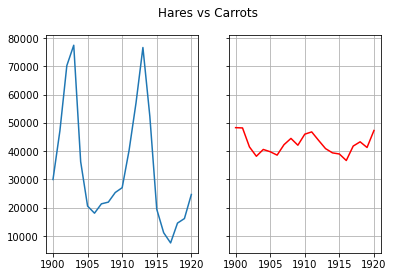

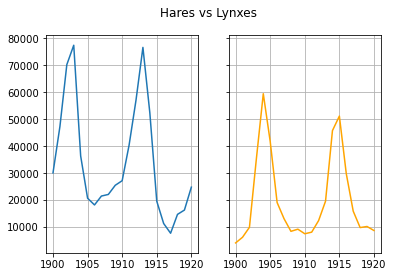

In [191]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
fig.suptitle('Hares vs Carrots')

axs[0].plot(data[:, 0], data[:, 1], label='Hare')
axs[1].plot(data[:, 0], data[:, 3], label='Carrot', color="red")

axs[0].grid(True)
axs[1].grid(True)

plt.show()

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Hares vs Lynxes')

axs[0].plot(data[:, 0], data[:, 1], label='Hare')
axs[1].plot(data[:, 0], data[:, 2], label='Lynxes', color="orange")

axs[0].grid(True)
axs[1].grid(True)

plt.show()